# Web Scraping with Beautiful Soup: Resident Advisor

## Task:

Resident Advisor is an events listing website for electronic music.

Go to www.residentadvisor.net/events.  This is the url we'll be starting with for this lab.  For question 1, just use this url.  In the next two, you'll use country and region in the format: http://www.residentadvisor.net/country/region/ i.e. us/losangeles/.  Be sure to explore the web pages in both the browser and the HTML file.  You'll need both to really understand what's going on.

1. Which venues are hosting events this week?
2. Make a function which returns the events this week given region and country (this will take two arguments)
    - return the event name, link, and list of artists
    - function returns list of ['event name', 'www.linkaddress.com', ['artist1','artist2','artist3']]
3. Create a function which returns the users attending 
4. Putting data into a dataframe
5. Comparing data across dataframes


### Question 1 - Which venues are hosting events this week?

In [221]:
#Enter starting_date and ending_date for queries
starting_date = '2019-03-22'
ending_date = '2019-03-28'

In [376]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [374]:
#creates list of dates between starting_date and ending_date, inclusive
def find_dates(start_date, end_date):
    list_of_days = []
    daterange = pd.date_range(start_date, end_date)
    for single_date in daterange:
        list_of_days.append(single_date.strftime("%Y-%m-%d"))
    
    return list_of_days

#build RA url from date, country, and region to find events
def build_url(date, country, region):
    host = 'https://www.residentadvisor.net/events/'
    url_country = country
    url_region = region
    url_date = date
    return f"{host}{url_country}/{url_region}/day/{url_date}"

#build RA url from country to find regons
def build_url_r(country):
    host = 'https://www.residentadvisor.net/events/'
    url_country = country
    return f"{host}{url_country}"

In [380]:
#function to find venues with event in a given country & region for a given date
def find_nightly_venues(date, country, region):
    #calls url function and parses results into Beautiful Soup
    r = requests.get(build_url(date, country, region))
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    
    #isolate HTML with event data
    events = soup.find_all('article', class_='event-item')
    
    #container for venues with events on a given night
    nightly_venues = []
    
    #loop through events to find element containing venue name
    for event in events:
        all_span = event.find_all('span')
        for item in all_span:
            if 'at' in item.get_text():
                #append event to container after splitting and stripping
                nightly_venues.append((item.get_text().split('at')[1].strip()))
            
    return nightly_venues

"""Function that loops through a list of dates, passing each date into the
find_nightly_venues function, and creates dictionary from return values"""
def find_venues(start_date, end_date, country, region):
    final_dict = {}
    list_of_dates = find_dates(start_date, end_date)
    for date in list_of_dates:
        final_dict[date] = find_nightly_venues(date, country, region)
    return final_dict

pp.pprint(find_venues(starting_date, ending_date, 'us', 'newyork'))

{'2019-03-22': ['Avant Gardner',
                'TBA - Brooklyn',
                'Knockdown Center',
                'Analog Bkny',
                'Elsewhere',
                '99 Scott Ave',
                'Nowadays',
                'Good Room',
                'TBA - Brooklyn',
                'Rose Gold',
                'TBA - New York',
                'Schimanski',
                'Eris',
                'Elsewhere',
                'TBA Brooklyn',
                'Hart bar',
                'Polygon BK',
                'House Of Yes',
                'Bossa Nova Civic Club',
                'Le Bain',
                'Jupiter Disco',
                'Nublu',
                'Ceremony',
                'Black Flamingo',
                'Le Poisson Rouge',
                'The Deep End',
                'The Spirit Room, Buffalo/Rochester',
                'Ms. Yoo',
                'Ignight',
                'TBA - New York'],
 '2019-03-23': ['Avant Gardner',
              

### Question 2 - Write a function to which returns the events this week given region and country.

In [375]:
#function to find events in a given country & region for a given date
def find_nightly_events(date, country, region):
    #pull correct url
    r = requests.get(build_url(date, country, region))
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    
    #isolate HTML with event data
    events = soup.find_all('article', class_='event-item')
    
    nightly_events = []
    
    #loop through events to find element containing event name
    for event in events:
        all_h1 = event.find_all('h1')
        for item in all_h1:
            nightly_events.append(item.get_text().strip())
            
    return nightly_events

"""Function that loops through a list of dates, passing each date into the
find_nightly_events function, and creates dictionary from return values"""
def find_events(start_date, end_date, country, region):
    final_dict = {}
    list_of_dates = find_dates(start_date, end_date)
    for date in list_of_dates:
        final_dict[date] = find_nightly_events(date, country, region)
    return final_dict

pp.pprint(find_events(starting_date, ending_date, 'us', 'newyork'))

{'2019-03-22': ['Holy Mountain: Poison & Pearls at Avant Gardner',
                'Sublimate: A Sprang Thang at TBA - Brooklyn',
                'Optimo at Knockdown Center',
                'Hernan Cattaneo (Open-Close) at Analog Bkny',
                'Nastia, Anthony Parasole, Patrick Russell, p.Leone B2B Mike '
                'Bloom & Deep Creep at Elsewhere',
                'Light & Life presents: Markus Schulz (Open to Close) at 99 '
                'Scott Ave',
                'Party: Beautiful Swimmers All Night at Nowadays',
                'Jonas Rathsman, Kim Ann Foxman, Matthias Heilbronn & Friends '
                'at Good Room',
                "De La'funk - 6 Year Anniversary with Christopher Ledger at "
                'TBA - Brooklyn',
                'Goonroom presents: Cinnaman [Dekmantel/De School], Day Cart & '
                'Wig-Wam at Rose Gold',
                'Disturbed with Traumer at TBA - New York',
                'Schimanski presents: Dom Dolla at S

In [383]:
"""Functions to find difference between State/Country(UK)
versus Region - Returns count of total events on given date"""

event_date = '2019-03-22'
country = 'us'
state = 'california'
regions = ['sanfrancisco', 'losangeles', 'sandiego', 'sacramento']

def state_v_region(country, state, list_regions):
    
    state_events = find_events(event_date, event_date, country, state)
    total_state_events = len([event for event in state_events[event_date]])

    regions_dict = {}

    for region in regions:
        regional_events = find_events(event_date, event_date, country, region)
        regions_dict[region] = len([event for event in regional_events[event_date]])
    
    sum_region_events = sum(regions_dict.values())
    
    return abs(total_state_events - sum_region_events)

print(state_v_region(country, state, regions))

1


### Question 3 - Create a function which returns the numbers of users attending each event this week, given country and region.  Then plot a histogram.

In [381]:
#function to find events in a given country & region for a given date
def nightly_users(date, country, region):
    #pull correct url
    r = requests.get(build_url(date, country, region))
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    
    #isolate HTML with event data
    events = soup.find_all('article', class_='event-item')

    event_with_users = {}
    #loop through events to find user count and assign to variable
    for event in events:
        all_p = event.find_all('p')
        for item in all_p:
            users = int((item.get_text().split(' ')[0]))
        #loop through events to find element containing event, add to dictionary with users attending
        all_h1 = event.find_all('h1')
        for item in all_h1:
            event_with_users[(item.get_text().strip())] = users
            
    return event_with_users

"""Function that loops through a list of dates, passing each date into the
find_nightly_events function, and creates dictionary from return values"""
def find_users(start_date, end_date, country, region):
    final_dict = {}
    list_of_dates = find_dates(start_date, end_date)
    for date in list_of_dates:
        final_dict[date] = nightly_users(date, country, region)
    return final_dict

users_dict = find_users(starting_date, ending_date, 'us', 'newyork')
pp.pprint(users_dict)

{'2019-03-22': {'33 Grand Music presents: Spring Break Forever at Ms. Yoo': 1,
                'Bloom with Random Rab at House Of Yes': 1,
                "D'Noir Am feat. Rob Hollywood Birthday Celebration & Friends at Polygon BK": 2,
                "De La'funk - 6 Year Anniversary with Christopher Ledger at TBA - Brooklyn": 39,
                'Disturbed with Traumer at TBA - New York': 37,
                'Electric Fire at Ignight': 1,
                'Goonroom presents: Cinnaman [Dekmantel/De School], Day Cart & Wig-Wam at Rose Gold': 37,
                'Hernan Cattaneo (Open-Close) at Analog Bkny': 106,
                'Holy Mountain: Poison & Pearls at Avant Gardner': 265,
                'Illumination at The Deep End': 1,
                'Intransit with David Gtronic at TBA Brooklyn': 5,
                'Jonas Rathsman, Kim Ann Foxman, Matthias Heilbronn & Friends at Good Room': 49,
                'Kool Bob Love aka Bobbito Garcia x Fatik x Tomas Station at Black Flamingo at 

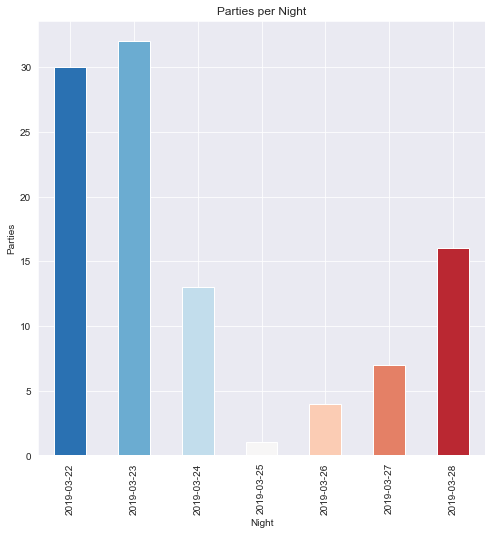

In [382]:
#now use the function to make a histogram
sns.set_style('darkgrid')
color_palette = sns.color_palette("RdBu_r", 7)

parties_df = pd.DataFrame(users_dict)
parties_per_night = parties_df.count()

ax = parties_per_night.plot(figsize=(8,8), kind='bar', color=color_palette)
ax.set(xlabel='Night', ylabel='Parties')
ax.set(title='Parties per Night')
plt.show()

In [385]:
#Function that produces a summary of nightly parties & attendees
def range_events_users(starting_date, ending_date):
    for night in find_dates(starting_date, ending_date):
        print('--', night, '--','\n')
        for party in users_dict[night]:
            print(party,'\n', 'attendees: ', users_dict[night][party], '\n')

range_events_users(starting_date, ending_date)

-- 2019-03-22 -- 

Holy Mountain: Poison & Pearls at Avant Gardner 
 attendees:  265 

Sublimate: A Sprang Thang at TBA - Brooklyn 
 attendees:  227 

Optimo at Knockdown Center 
 attendees:  140 

Hernan Cattaneo (Open-Close) at Analog Bkny 
 attendees:  106 

Nastia, Anthony Parasole, Patrick Russell, p.Leone B2B Mike Bloom & Deep Creep at Elsewhere 
 attendees:  89 

Light & Life presents: Markus Schulz (Open to Close) at 99 Scott Ave 
 attendees:  78 

Party: Beautiful Swimmers All Night at Nowadays 
 attendees:  68 

Jonas Rathsman, Kim Ann Foxman, Matthias Heilbronn & Friends at Good Room 
 attendees:  49 

De La'funk - 6 Year Anniversary with Christopher Ledger at TBA - Brooklyn 
 attendees:  39 

Goonroom presents: Cinnaman [Dekmantel/De School], Day Cart & Wig-Wam at Rose Gold 
 attendees:  37 

Disturbed with Traumer at TBA - New York 
 attendees:  37 

Schimanski presents: Dom Dolla at Schimanski 
 attendees:  15 

Material 015: Taylor Shockley & Emil Bergh at Eris 
 attende

### Question 4 - Put the data for all concerts in the US and UK into Pandas dataframes.
Think about what columns to include - concert titles, region, venues, URLs, dates, etc. You'll want to have a dataframe per country.

Also think about how to deal with inconsistent/NaN values.

In [384]:
us_tag = ('United States of America', 'us')
uk_tag = ('United Kingdom', 'uk')

def find_all_regions():
    list_of_regions = []
    
    r = requests.get('https://www.residentadvisor.net/events?show=all')
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')

    #find country tag
    country_heading = soup.find('h1', string=uk_tag[0])
   
    #loop through siblings of country
    
    sibling = country_heading.next_sibling
    state = True
    
    for item in sibling:
        if item.next_sibling is None:
            break
        else:
            if '-' in item.next_sibling.get_text():
                list_of_regions.append(item.next_sibling.get_text())
            else:
                if item.get_text() not in list_of_regions:
                    list_of_regions.append(item.get_text())
   
    return list_of_regions

find_all_regions()

['London',
 'Midlands',
 '- Leeds',
 '- Liverpool',
 '- Manchester',
 '- Newcastle',
 'Northern Ireland',
 '- Aberdeen',
 '- Edinburgh',
 '- Glasgow',
 'South + East']

### Question 5 (Bonus) - Compare the concert scenes of the two countries and find:
1. The difference in the number of concert-hosting venues per country
2. The number of concerts happening THIS SATURDAY in each country
3. Are there any artists playing in both countries?